
## Entrega 2

**Entrega 2** del proyecto de procesamiento de datos a gran escala.
[Hiperviculo](URL)



Carga de base de datos de la base de datos de Colisiones con el nombre dataframe como **df3**

In [0]:
# File location and type
file_location = "/FileStore/tables/Motor_Vehicle_Collisions___Vehicles_20240313.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df3 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df3)
print("Muestra de datos en df:")

DataFrame[UNIQUE_ID: string, COLLISION_ID: string, CRASH_DATE: string, CRASH_TIME: string, VEHICLE_ID: string, STATE_REGISTRATION: string, VEHICLE_TYPE: string, VEHICLE_MAKE: string, VEHICLE_MODEL: string, VEHICLE_YEAR: string, TRAVEL_DIRECTION: string, VEHICLE_OCCUPANTS: string, DRIVER_SEX: string, DRIVER_LICENSE_STATUS: string, DRIVER_LICENSE_JURISDICTION: string, PRE_CRASH: string, POINT_OF_IMPACT: string, VEHICLE_DAMAGE: string, VEHICLE_DAMAGE_1: string, VEHICLE_DAMAGE_2: string, VEHICLE_DAMAGE_3: string, PUBLIC_PROPERTY_DAMAGE: string, PUBLIC_PROPERTY_DAMAGE_TYPE: string, CONTRIBUTING_FACTOR_1: string, CONTRIBUTING_FACTOR_2: string]Muestra de datos en df:


Carga de la base de datos de Arrestos con el nombre dataframe como **df**

In [0]:
# File location and type
file_location = "/FileStore/tables/NYPD_Arrest_Data__Year_to_Date__20240313.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

DataFrame[ARREST_KEY: string, ARREST_DATE: string, PD_CD: string, PD_DESC: string, KY_CD: string, OFNS_DESC: string, LAW_CODE: string, LAW_CAT_CD: string, ARREST_BORO: string, ARREST_PRECINCT: string, JURISDICTION_CODE: string, AGE_GROUP: string, PERP_SEX: string, PERP_RACE: string, X_COORD_CD: string, Y_COORD_CD: string, Latitude: string, Longitude: string, New Georeferenced Column: string]

Se imprimen los datos que hay en cada base de datos

In [0]:
# Ver los tipos de datos actuales en df
print("Tipos de datos en df:")
df.printSchema()

# Ver los tipos de datos actuales en df3
print("\nTipos de datos en df3:")
df3.printSchema()

Tipos de datos en df:
root
 |-- ARREST_KEY: string (nullable = true)
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_CD: string (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: string (nullable = true)
 |-- JURISDICTION_CODE: string (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: string (nullable = true)
 |-- Y_COORD_CD: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- New Georeferenced Column: string (nullable = true)


Tipos de datos en df3:
root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TI

Revisar la Calidad de los Datos 
Revisión de Datos Faltantes

<Figure size 720x432 with 0 Axes>

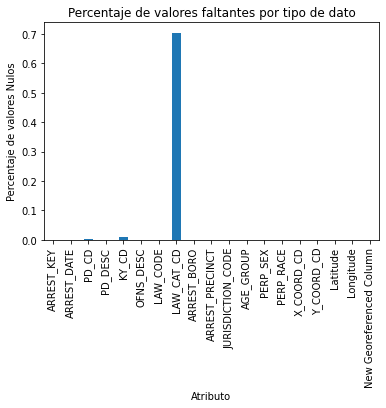

In [0]:
from pyspark.sql.functions import col, sum, count, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    total_counts = df.count()
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Aplicar la función
nan_counts, nan_percentages = count_nan_percentage(df)

# Convertir a pandas para la visualización
nan_percentages_pd = nan_percentages.toPandas().transpose()
nan_percentages_pd.columns = ['Percentage']
nan_percentages_pd.index.name = 'Column'

# Plot
plt.figure(figsize=(10, 6))
nan_percentages_pd.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Atributo')
plt.ylabel('Percentaje de valores Nulos')
plt.title('Percentaje de valores faltantes por tipo de dato')
plt.show()


<Figure size 720x432 with 0 Axes>

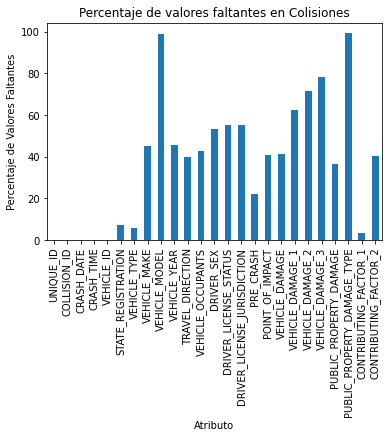

In [0]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    total_counts = df.count()
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Aplicar la función a df3
nan_counts_df3, nan_percentages_df3 = count_nan_percentage(df3)

# Convertir a pandas para la visualización
nan_percentages_df3_pd = nan_percentages_df3.toPandas().transpose()
nan_percentages_df3_pd.columns = ['Percentage']
nan_percentages_df3_pd.index.name = 'Column'

# Plot para df3
plt.figure(figsize=(10, 6))
nan_percentages_df3_pd.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Atributo')
plt.ylabel('Percentaje de Valores Faltantes')
plt.title('Percentaje de valores faltantes en Colisiones')
plt.show()


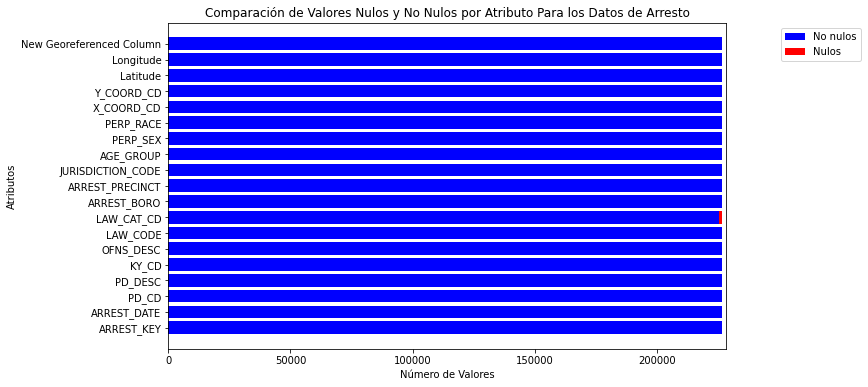

In [0]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

def count_not_null(df):
    return df.select([sum(when(col(c).isNotNull(), 1).otherwise(0)).alias(c) for c in df.columns])

def count_null(df):
    return df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])

# Obtener nombres de columnas
columnas = df.columns

# Contar valores no nulos
NOnulos_df = count_not_null(df).toPandas().transpose()
NOnulos_df.columns = ['No Nulos']
NOnulos_df.index.name = 'Atributo'

# Contar valores nulos
nulos_df = count_null(df).toPandas().transpose()
nulos_df.columns = ['Nulos']
nulos_df.index.name = 'Atributo'

# Unir los resultados en un solo DataFrame
total_df = NOnulos_df.join(nulos_df)

# Crear la visualización
plt.figure(figsize=(10, 6))

# Graficar valores no nulos
plt.barh(total_df.index, total_df['No Nulos'], color='blue', label='No nulos')

# Graficar valores nulos
plt.barh(total_df.index, total_df['Nulos'], left=total_df['No Nulos'], color='red', label='Nulos')

# Configurar el título y etiquetas del gráfico
plt.title('Comparación de Valores Nulos y No Nulos por Atributo Para los Datos de Arresto')
plt.xlabel('Número de Valores')
plt.ylabel('Atributos')

# Establecer los límites del eje x
plt.xlim(0, total_df['No Nulos'].max() + total_df['Nulos'].max())

# Posicionar la leyenda en el espacio
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar la gráfica
plt.show()



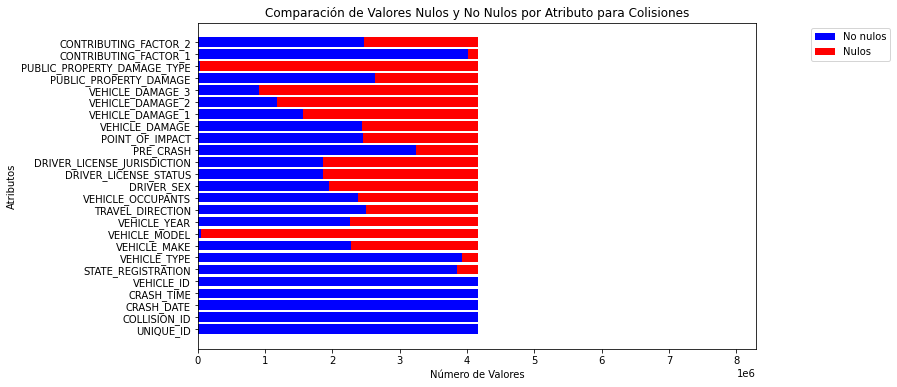

In [0]:
# Obtener nombres de columnas
columnas_df3 = df3.columns

# Contar valores no nulos
NOnulos_df3 = count_not_null(df3).toPandas().transpose()
NOnulos_df3.columns = ['No Nulos']
NOnulos_df3.index.name = 'Atributo'

# Contar valores nulos
nulos_df3 = count_null(df3).toPandas().transpose()
nulos_df3.columns = ['Nulos']
nulos_df3.index.name = 'Atributo'

# Unir los resultados en un solo DataFrame
total_df3 = NOnulos_df3.join(nulos_df3)

# Crear la visualización para df3
plt.figure(figsize=(10, 6))

# Graficar valores no nulos
plt.barh(total_df3.index, total_df3['No Nulos'], color='blue', label='No nulos')

# Graficar valores nulos
plt.barh(total_df3.index, total_df3['Nulos'], left=total_df3['No Nulos'], color='red', label='Nulos')

# Configurar el título y etiquetas del gráfico
plt.title('Comparación de Valores Nulos y No Nulos por Atributo para Colisiones')
plt.xlabel('Número de Valores')
plt.ylabel('Atributos')

# Establecer los límites del eje x
plt.xlim(0, total_df3['No Nulos'].max() + total_df3['Nulos'].max())

# Posicionar la leyenda en el espacio
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar la gráfica
plt.show()


Imputación de Valores Faltantes con la media para las variables cuantitativas, y la moda para las cualitativas

Para los valore de el dataset de Arrestos se eliminan varias columnas que no aportan datos enriquecedores como ARREST_KEY,PD_CD,LAW_CODE,LAW_CAT_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,New Georeferenced Column '(para esta ultima podia eliminarse los valores de latitud y longitud pues son datos repetidos)', adicionalmente como la calidad de datos faltantes es muy poca se eliminan estos datos

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Clean Data").getOrCreate()


# Eliminar las columnas especificadas de df
columns_to_drop = ["ARREST_KEY", "PD_CD", "KY_CD","LAW_CODE", "LAW_CAT_CD", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "New Georeferenced Column"]
df = df.drop(*columns_to_drop)

# mostrar datos
df.show(5)

+-----------+--------------------+--------------+-----------+---------------+---------+--------+---------+---------+----------+
|ARREST_DATE|             PD_DESC|     OFNS_DESC|ARREST_BORO|ARREST_PRECINCT|AGE_GROUP|PERP_SEX|PERP_RACE| Latitude| Longitude|
+-----------+--------------------+--------------+-----------+---------------+---------+--------+---------+---------+----------+
| 01/03/2023|ROBBERY,OPEN AREA...|       ROBBERY|          B|             49|    18-24|       M|    BLACK|40.855793|-73.843908|
| 01/03/2023|   STRANGULATION 1ST|FELONY ASSAULT|          S|            120|    25-44|       M|    WHITE|40.644996|-74.077263|
| 01/04/2023|ROBBERY,OPEN AREA...|       ROBBERY|          K|             61|      <18|       M|    BLACK|40.594054|-73.960866|
| 01/04/2023|   STRANGULATION 1ST|FELONY ASSAULT|          Q|            114|    18-24|       M|    BLACK|40.769552|-73.915361|
| 01/05/2023|BURGLARY,UNCLASSI...|      BURGLARY|          B|             44|    25-44|       F|    BLAC

Revisión nueva de como queda el DataFrame

<Figure size 720x432 with 0 Axes>

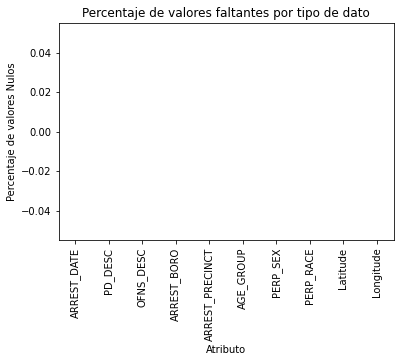

In [0]:
from pyspark.sql.functions import col, sum, count, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    total_counts = df.count()
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Aplicar la función
nan_counts, nan_percentages = count_nan_percentage(df)

# Convertir a pandas para la visualización
nan_percentages_pd = nan_percentages.toPandas().transpose()
nan_percentages_pd.columns = ['Percentage']
nan_percentages_pd.index.name = 'Column'

# Plot
plt.figure(figsize=(10, 6))
nan_percentages_pd.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Atributo')
plt.ylabel('Percentaje de valores Nulos')
plt.title('Percentaje de valores faltantes por tipo de dato')
plt.show()


Imputacion de valores para el Dataframe de Colisiones.

Adicionalmente se eliminan las columnas que no aportan datos importantes como 

UNIQUE_ID,COLLISION_ID,VEHICLE_ID,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,VEHICLE_DAMAGE_1,
VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE_TYPE

Algunas se eliminan por que la cantidad de datos faltantes es muy alta como el caso de PUBLIC_PROPERTY_DAMAGE_TYPE y VEHICLE_MODEL


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Clean Data").getOrCreate()

# Filtrar registros con valores atípicos en VEHICLE_YEAR
df_clean = df3.filter(df3['VEHICLE_YEAR'] <= 2024)

cols_to_drop = ['UNIQUE_ID', 'COLLISION_ID', 'VEHICLE_ID','VEHICLE_MODEL', 'DRIVER_SEX', 'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'VEHICLE_DAMAGE_1', 'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE_TYPE']
df3 = df3.drop(*cols_to_drop)

df3.show(5)

+----------+----------+------------------+--------------------+-------------+------------+----------------+-----------------+--------------------+-----------------+--------------------+----------------------+---------------------+---------------------+
|CRASH_DATE|CRASH_TIME|STATE_REGISTRATION|        VEHICLE_TYPE| VEHICLE_MAKE|VEHICLE_YEAR|TRAVEL_DIRECTION|VEHICLE_OCCUPANTS|           PRE_CRASH|  POINT_OF_IMPACT|      VEHICLE_DAMAGE|PUBLIC_PROPERTY_DAMAGE|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|
+----------+----------+------------------+--------------------+-------------+------------+----------------+-----------------+--------------------+-----------------+--------------------+----------------------+---------------------+---------------------+
|09/07/2012|      9:03|                NY|   PASSENGER VEHICLE|         null|        null|            null|             null|                null|             null|                null|                  null|          Unspecified|           

Revisón de datos luego de la eliminación de columnas con datos que no generan información

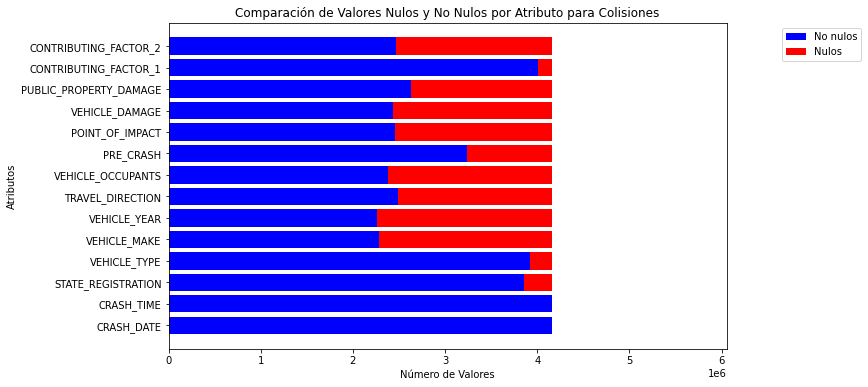

In [0]:
# Obtener nombres de columnas
columnas_df3 = df3.columns

# Contar valores no nulos
NOnulos_df3 = count_not_null(df3).toPandas().transpose()
NOnulos_df3.columns = ['No Nulos']
NOnulos_df3.index.name = 'Atributo'

# Contar valores nulos
nulos_df3 = count_null(df3).toPandas().transpose()
nulos_df3.columns = ['Nulos']
nulos_df3.index.name = 'Atributo'

# Unir los resultados en un solo DataFrame
total_df3 = NOnulos_df3.join(nulos_df3)

# Crear la visualización para df3
plt.figure(figsize=(10, 6))

# Graficar valores no nulos
plt.barh(total_df3.index, total_df3['No Nulos'], color='blue', label='No nulos')

# Graficar valores nulos
plt.barh(total_df3.index, total_df3['Nulos'], left=total_df3['No Nulos'], color='red', label='Nulos')

# Configurar el título y etiquetas del gráfico
plt.title('Comparación de Valores Nulos y No Nulos por Atributo para Colisiones')
plt.xlabel('Número de Valores')
plt.ylabel('Atributos')

# Establecer los límites del eje x
plt.xlim(0, total_df3['No Nulos'].max() + total_df3['Nulos'].max())

# Posicionar la leyenda en el espacio
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar la gráfica
plt.show()


<Figure size 720x432 with 0 Axes>

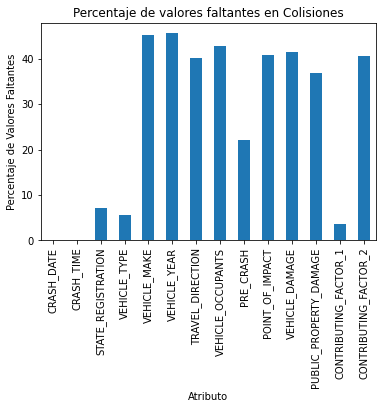

In [0]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    total_counts = df.count()
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Aplicar la función a df3
nan_counts_df3, nan_percentages_df3 = count_nan_percentage(df3)

# Convertir a pandas para la visualización
nan_percentages_df3_pd = nan_percentages_df3.toPandas().transpose()
nan_percentages_df3_pd.columns = ['Percentage']
nan_percentages_df3_pd.index.name = 'Column'

# Plot para df3
plt.figure(figsize=(10, 6))
nan_percentages_df3_pd.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Atributo')
plt.ylabel('Percentaje de Valores Faltantes')
plt.title('Percentaje de valores faltantes en Colisiones')
plt.show()


In [0]:
num_rows = df3.count()
print(f"El número de filas en df3 es: {num_rows}")

El número de filas en df3 es: 4158869


Se eliminan los datos faltantes relacionados con PRE_CRASH

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Clean Data").getOrCreate()


# Borrar filas donde PRE_CRASH es nulo o faltante
df3 = df3.dropna(subset=['PRE_CRASH'])

df3.show(5)


+----------+----------+------------------+--------------------+--------------+------------+----------------+-----------------+--------------------+--------------------+--------------------+----------------------+---------------------+---------------------+
|CRASH_DATE|CRASH_TIME|STATE_REGISTRATION|        VEHICLE_TYPE|  VEHICLE_MAKE|VEHICLE_YEAR|TRAVEL_DIRECTION|VEHICLE_OCCUPANTS|           PRE_CRASH|     POINT_OF_IMPACT|      VEHICLE_DAMAGE|PUBLIC_PROPERTY_DAMAGE|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|
+----------+----------+------------------+--------------------+--------------+------------+----------------+-----------------+--------------------+--------------------+--------------------+----------------------+---------------------+---------------------+
|09/23/2019|      8:15|                NY|Station Wagon/Spo...| TOYT -CAR/SUV|        2002|           North|                1|Going Straight Ahead|   Left Front Bumper|Left Front Quarte...|                     N| Driver Inattenti

<Figure size 720x432 with 0 Axes>

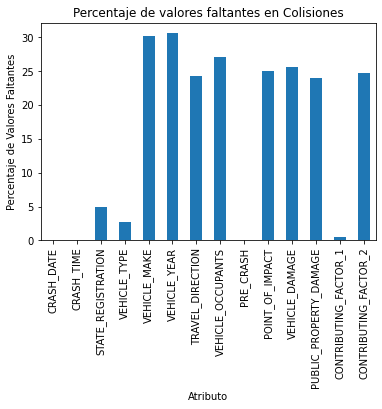

In [0]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    total_counts = df.count()
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Aplicar la función a df3
nan_counts_df3, nan_percentages_df3 = count_nan_percentage(df3)

# Convertir a pandas para la visualización
nan_percentages_df3_pd = nan_percentages_df3.toPandas().transpose()
nan_percentages_df3_pd.columns = ['Percentage']
nan_percentages_df3_pd.index.name = 'Column'

# Plot para df3
plt.figure(figsize=(10, 6))
nan_percentages_df3_pd.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Atributo')
plt.ylabel('Percentaje de Valores Faltantes')
plt.title('Percentaje de valores faltantes en Colisiones')
plt.show()


In [0]:
##cosas
#Se esperaba que quedaran menos datos nulos

In [0]:
df3.printSchema()

root
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_YEAR: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)



In [0]:
df.printSchema()

root
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: string (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



Voy acrear otro DF alterno, dado que no estoy muy seguro de rellenar los datos

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, lit


# Crear una sesión de Spark
spark = SparkSession.builder.appName("Data Imputation").getOrCreate()

# Convertir VEHICLE_YEAR y VEHICLE_OCCUPANTS a tipo numérico
df3 = df3.withColumn("VEHICLE_YEAR", col("VEHICLE_YEAR").cast("int"))
df3 = df3.withColumn("VEHICLE_OCCUPANTS", col("VEHICLE_OCCUPANTS").cast("int"))


# Imputar valores faltantes en VEHICLE_YEAR con la mediana
median_year = df3.approxQuantile('VEHICLE_YEAR', [0.5], 0.001)[0]
df3I = df3.withColumn('VEHICLE_YEAR', when(col('VEHICLE_YEAR').isNull(), median_year).otherwise(col('VEHICLE_YEAR')))

# Imputar valores faltantes en VEHICLE_OCCUPANTS con la mediana
median_occupants = df3.approxQuantile('VEHICLE_OCCUPANTS', [0.5], 0.001)[0]
df3I = df3I.withColumn('VEHICLE_OCCUPANTS', when(col('VEHICLE_OCCUPANTS').isNull(), median_occupants).otherwise(col('VEHICLE_OCCUPANTS')))

# Imputar valores faltantes en las columnas de tipo string con la moda
string_cols = ['STATE_REGISTRATION', 'VEHICLE_TYPE','VEHICLE_MAKE', 
               'TRAVEL_DIRECTION', 'POINT_OF_IMPACT', 
               'VEHICLE_DAMAGE', 'PUBLIC_PROPERTY_DAMAGE', 
               'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']

for col_name in string_cols:
    mode = df3.groupBy(col_name).count().orderBy('count', ascending=False).first()[0]
    if mode is None:
        second_mode = df3.groupBy(col_name).count().orderBy('count', ascending=False).collect()[1][0]
        df3I = df3I.withColumn(col_name, when(col(col_name).isNull(), second_mode).otherwise(col(col_name)))
    else:
        df3I = df3I.withColumn(col_name, when(col(col_name).isNull(), mode).otherwise(col(col_name)))

# Mostrar el esquema del DataFrame resultante y las primeras 5 filas
df3I.printSchema()
df3I.show(5)

# Mostrar las primeras 5 filas del DataFrame original df3
df3.show(5)


root
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_YEAR: double (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: double (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)

+----------+----------+------------------+--------------------+--------------+------------+----------------+-----------------+--------------------+--------------------+--------------------+----------------------+---------------------+---------------------+
|CRASH_DATE|CRASH_TIME|STATE_REGISTRATION|        VEHICLE_TYPE|  VEHICLE_MAKE|VE

<Figure size 720x432 with 0 Axes>

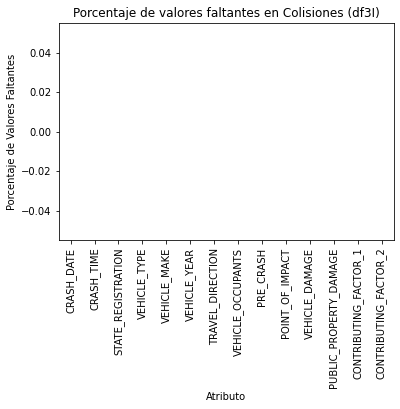

In [0]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    total_counts = df.count()
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Aplicar la función a df3I
nan_counts_df3I, nan_percentages_df3I = count_nan_percentage(df3I)

# Convertir a pandas para la visualización
nan_percentages_df3I_pd = nan_percentages_df3I.toPandas().transpose()
nan_percentages_df3I_pd.columns = ['Percentage']
nan_percentages_df3I_pd.index.name = 'Column'

# Plot para df3I
plt.figure(figsize=(10, 6))
nan_percentages_df3I_pd.plot(kind='bar', legend=False, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Atributo')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.title('Porcentaje de valores faltantes en Colisiones (df3I)')
plt.show()


<Figure size 720x432 with 0 Axes>

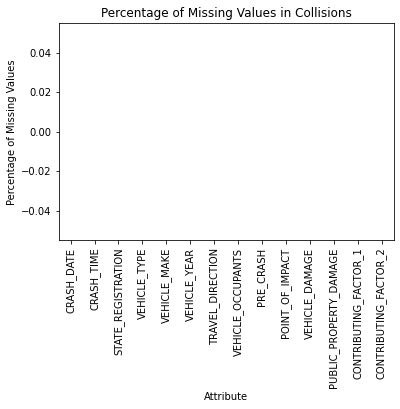

In [0]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt

# Función para contar NaN y calcular porcentaje de NaN por columna en PySpark
def count_nan_percentage(df):
    total_counts = df.count()
    nan_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    nan_percentages = nan_counts.select([(col(c) / total_counts * 100).alias(c) for c in nan_counts.columns])
    return nan_counts, nan_percentages

# Supongamos que df_imputed es tu nuevo DataFrame después de la imputación de datos

# Aplicar la función a df_imputed
nan_counts_df_imputed, nan_percentages_df_imputed = count_nan_percentage(df3I)

# Convertir a pandas para la visualización
nan_percentages_df_imputed_pd = nan_percentages_df_imputed.toPandas().transpose()
nan_percentages_df_imputed_pd.columns = ['Percentage']
nan_percentages_df_imputed_pd.index.name = 'Column'

# Plot para df_imputed
plt.figure(figsize=(10, 6))
nan_percentages_df_imputed_pd.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Collisions')
plt.show()

In [0]:
num_rows = df3.count()
print(f"El número de filas en df3 es: {num_rows}")

El número de filas en df3 es: 3239514


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, median

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Cleaning Data").getOrCreate()

# Filtrar registros con valores atípicos en VEHICLE_YEAR
df_clean = df3.filter(df3['VEHICLE_YEAR'] <= 2024)

# Imputar valores faltantes en VEHICLE_YEAR con la mediana
median_year = df_clean.approxQuantile('VEHICLE_YEAR', [0.5], 0.001)[0]
df_clean = df_clean.withColumn('VEHICLE_YEAR', when(col('VEHICLE_YEAR').isNull(), median_year).otherwise(col('VEHICLE_YEAR')))

# Imputar valores faltantes en STATE_REGISTRATION con el valor más frecuente
most_frequent_state = df_clean.groupBy('STATE_REGISTRATION').count().orderBy('count', ascending=False).first()[0]
df_clean = df_clean.withColumn('STATE_REGISTRATION', when(col('STATE_REGISTRATION').isNull(), most_frequent_state).otherwise(col('STATE_REGISTRATION')))

# Imputar valores faltantes en VEHICLE_OCCUPANTS con la mediana
median_occupants = df_clean.approxQuantile('VEHICLE_OCCUPANTS', [0.5], 0.001)[0]
df_clean = df_clean.withColumn('VEHICLE_OCCUPANTS', when(col('VEHICLE_OCCUPANTS').isNull(), median_occupants).otherwise(col('VEHICLE_OCCUPANTS')))

# Eliminar columnas con alta cantidad de valores faltantes
"""threshold = 0.5  # Umbral para la proporción de valores faltantes
total_rows = df_clean.count()
columns_to_drop = [col for col in df_clean.columns if df_clean.filter(df_clean[col].isNull()).count() / total_rows > threshold]
df_clean = df_clean.drop(*columns_to_drop)"""

# Mostrar información del dataset limpio
df_clean.printSchema()


root
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_YEAR: double (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: double (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# Crear una sesión de Spark
spark = SparkSession.builder.appName("AgeCategorization").getOrCreate()

# Suponiendo que ya tienes df definido y cargado correctamente

# Obtener los valores únicos de AGE_GROUP
unique_age_groups = df.select("AGE_GROUP").distinct()

print("Valores únicos en la columna AGE_GROUP:")
unique_age_groups.show()

# Aplicar la categorización basada en rangos de edad
df = df.withColumn("AGE_CATEGORY",
                   when(col("AGE_GROUP").isNull(), "Unknown")
                   .when(col("AGE_GROUP") == "UNKNOWN", "Unknown")
                   .when(col("AGE_GROUP") == "<18", "Menor de Edad")
                   .when((col("AGE_GROUP") == "18-24"), "Joven")
                   .when((col("AGE_GROUP") == "25-44"), "Adulto")
                   .when((col("AGE_GROUP") == "45-64"), "Adulto Mayor")
                   .when((col("AGE_GROUP") == "65+"), "Tercera Edad")
                   .otherwise("Otros"))

# Mostrar una muestra de datos con la nueva columna AGE_CATEGORY
print("\nMuestra de datos con la nueva columna AGE_CATEGORY:")
df.select("AGE_GROUP", "AGE_CATEGORY").show(10, truncate=False)


Valores únicos en la columna AGE_GROUP:
+---------+
|AGE_GROUP|
+---------+
|      <18|
|    25-44|
|      65+|
|    18-24|
|    45-64|
+---------+


Muestra de datos con la nueva columna AGE_CATEGORY:
+---------+-------------+
|AGE_GROUP|AGE_CATEGORY |
+---------+-------------+
|18-24    |Joven        |
|25-44    |Adulto       |
|<18      |Menor de Edad|
|18-24    |Joven        |
|25-44    |Adulto       |
|25-44    |Adulto       |
|25-44    |Adulto       |
|25-44    |Adulto       |
|25-44    |Adulto       |
|25-44    |Adulto       |
+---------+-------------+
only showing top 10 rows



Se hace el cambio de tipo de datos luego de la limpieza por problemas con los datos de fechas

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, IntegerType, DoubleType, TimestampType
from pyspark.sql.functions import col, to_timestamp

# Esquema para df
schema_df = {
    "ARREST_KEY": IntegerType(),
    "ARREST_DATE": StringType(),
    "PD_CD": IntegerType(),
    "PD_DESC": StringType(),
    "KY_CD": IntegerType(),
    "OFNS_DESC": StringType(),
    "LAW_CODE": StringType(),
    "LAW_CAT_CD": StringType(),
    "ARREST_BORO": StringType(),
    "ARREST_PRECINCT": IntegerType(),
    "JURISDICTION_CODE": IntegerType(),
    "AGE_GROUP": StringType(),
    "PERP_SEX": StringType(),
    "PERP_RACE": StringType(),
    "X_COORD_CD": IntegerType(),
    "Y_COORD_CD": IntegerType(),
    "Latitude": DoubleType(),
    "Longitude": DoubleType(),
    "New Georeferenced Column": StringType()  # Ajusta el tipo según el contenido
}

# Esquema para df3
schema_df3 = {
    "UNIQUE_ID": IntegerType(),
    "COLLISION_ID": IntegerType(),
    "CRASH_DATE": StringType(),
    "CRASH_TIME": StringType(),
    "VEHICLE_ID": IntegerType(),
    "STATE_REGISTRATION": StringType(),
    "VEHICLE_TYPE": StringType(),
    "VEHICLE_MAKE": StringType(),
    "VEHICLE_MODEL": StringType(),
    "VEHICLE_YEAR": IntegerType(),
    "TRAVEL_DIRECTION": StringType(),
    "VEHICLE_OCCUPANTS": IntegerType(),
    "DRIVER_SEX": StringType(),
    "DRIVER_LICENSE_STATUS": StringType(),
    "DRIVER_LICENSE_JURISDICTION": StringType(),
    "PRE_CRASH": StringType(),
    "POINT_OF_IMPACT": StringType(),
    "VEHICLE_DAMAGE": StringType(),
    "VEHICLE_DAMAGE_1": StringType(),
    "VEHICLE_DAMAGE_2": StringType(),
    "VEHICLE_DAMAGE_3": StringType(),
    "PUBLIC_PROPERTY_DAMAGE": StringType(),
    "PUBLIC_PROPERTY_DAMAGE_TYPE": StringType(),
    "CONTRIBUTING_FACTOR_1": StringType(),
    "CONTRIBUTING_FACTOR_2": StringType()
}

# Crear una sesión de Spark
spark = SparkSession.builder.appName("ConvertDates").getOrCreate()


# Convertir ARREST_DATE en df al formato correcto
df = df.withColumn("ARREST_DATE", to_timestamp(df["ARREST_DATE"], "MM/dd/yyyy"))

# Convertir CRASH_DATE en df3 al formato correcto
df3 = df3.withColumn("CRASH_DATE", to_timestamp(df3["CRASH_DATE"], "MM/dd/yyyy"))
df3 = df3.withColumn("CRASH_TIME", to_timestamp(col("CRASH_TIME"), "HH:mm:ss"))

# Imprimir una muestra de datos en df después de la conversión
print("\nMuestra de datos en df después de la conversión:")
df.show(5, truncate=False)

# Imprimir una muestra de datos en df3 después de la conversión
print("\nMuestra de datos en df3 después de la conversión:")
df3.show(5, truncate=False)



Muestra de datos en df después de la conversión:
+-------------------+------------------------------+--------------+-----------+---------------+---------+--------+---------+---------+----------+-------------+
|ARREST_DATE        |PD_DESC                       |OFNS_DESC     |ARREST_BORO|ARREST_PRECINCT|AGE_GROUP|PERP_SEX|PERP_RACE|Latitude |Longitude |AGE_CATEGORY |
+-------------------+------------------------------+--------------+-----------+---------------+---------+--------+---------+---------+----------+-------------+
|2023-01-03 00:00:00|ROBBERY,OPEN AREA UNCLASSIFIED|ROBBERY       |B          |49             |18-24    |M       |BLACK    |40.855793|-73.843908|Joven        |
|2023-01-03 00:00:00|STRANGULATION 1ST             |FELONY ASSAULT|S          |120            |25-44    |M       |WHITE    |40.644996|-74.077263|Adulto       |
|2023-01-04 00:00:00|ROBBERY,OPEN AREA UNCLASSIFIED|ROBBERY       |K          |61             |<18      |M       |BLACK    |40.594054|-73.960866|Menor

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import pandas as pd

# Crear una sesión de Spark
spark = SparkSession.builder.appName("Correlation Heatmap").getOrCreate()

# Función para calcular la correlación y generar el mapa de calor
def correlation_heatmap(df, title):
    # Seleccionar solo las columnas numéricas
    numeric_columns = [col_name for col_name, data_type in df.dtypes if data_type in ['int', 'double']]
    df = df.select(numeric_columns)

    # Manejar valores nulos
    df = df.na.drop()

    # Comprobar si quedan datos después de eliminar nulos
    if df.count() == 0:
        print(f"No hay suficientes datos numéricos para calcular la correlación en el DataFrame {title}.")
        return
    
    # Crear un VectorAssembler para combinar las columnas en un solo vector
    vector_assembler = VectorAssembler(inputCols=df.columns, outputCol='features')

    # Aplicar el VectorAssembler al DataFrame
    df_assembled = vector_assembler.transform(df).select('features')

    # Calcular la matriz de correlación
    matrix = Correlation.corr(df_assembled, 'features').head()[0]
    correlation_matrix = matrix.toArray()

    # Obtener los nombres de las columnas para el mapa de calor
    columns = numeric_columns

    # Crear un DataFrame de pandas para el mapa de calor
    correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)

    # Generar el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Mapa de Calor de Correlación Entre Atributos - {title}')
    plt.show()

# Calcular y mostrar el mapa de calor para df
correlation_heatmap(df, "DataFrame df")

# Calcular y mostrar el mapa de calor para df3
correlation_heatmap(df3, "DataFrame df3")


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-3752944834782661>:49
     46     plt.show()
     48 # Calcular y mostrar el mapa de calor para df
---> 49 correlation_heatmap(df, "DataFrame df")
     51 # Calcular y mostrar el mapa de calor para df3
     52 correlation_heatmap(df3, "DataFrame df3")

File <command-3752944834782661>:33, in correlation_heatmap(df, title)
     30 df_assembled = vector_assembler.transform(df).select('features')
     32 # Calcular la matriz de correlación
---> 33 matrix = Correlation.corr(df_assembled, 'features').head()[0]
     34 correlation_matrix = matrix.toArray()
     36 # Obtener los nombres de las columnas para el mapa de calor

File /databricks/spark/python/pyspark/ml/stat.py:181, in Correlation.corr(dataset, column, method)
    179 javaCorrObj = _jvm().org.apache.spark.ml.stat.Correlation
    180 args = [_py2java(sc, arg) for arg in 

Tratamiento Datos faltantes

In [0]:
%pip install folium


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML

# Crear una sesión de Spark
spark = SparkSession.builder.appName("HeatMap").getOrCreate()

# Suponiendo que df tiene las columnas 'latitude' y 'longitude'
# Si ya tienes df definido correctamente, puedes continuar con él

# Convertir los datos a una lista de coordenadas
lat_long_list = df.select("latitude", "longitude").collect()
heat_data = [[row['latitude'], row['longitude']] for row in lat_long_list]

# Crear el mapa base
m = folium.Map(location=[df.agg({"latitude": "mean"}).collect()[0][0], df.agg({"longitude": "mean"}).collect()[0][0]], zoom_start=4)

# Crear el mapa de calor
HeatMap(heat_data).add_to(m)

# Guardar el mapa como HTML en una variable
map_html = m._repr_html_()

# Mostrar el mapa en una celda de Databricks
display(HTML(map_html))


In [0]:
# Create a view or table

temp_table_name = "Motor_Vehicle_Collisions___Vehicles_20240313_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `Motor_Vehicle_Collisions___Vehicles_20240313_csv`

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "Motor_Vehicle_Collisions___Vehicles_20240313_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)